<h1 style="font-size:32px; text-align:center;">Projet Scoring</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Ousmane KA</h1>
<hr>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from skimpy import skim
import warnings
import os
import black
import itertools
import random

# Bibliothèques générales
import statsmodels.api as sm 
from optbinning import OptimalBinning

# Typage
from typing import Callable, List, Optional, Tuple, Union

# Analyse exploratoire des données (EDA)
from scipy.optimize import curve_fit
from scipy.stats import (
    zscore,
    skew,
    chi2_contingency,
    mannwhitneyu,
    ks_2samp,
)

# Prétraitement
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder
)
from sklearn.impute import (
    KNNImputer,
    SimpleImputer
)

# Modèles
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RepeatedStratifiedKFold
)
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn import (
    tree,
    ensemble,
    linear_model
)

from sklearn.feature_selection import SelectKBest, f_classif, chi2 


# Gestion des données déséquilibrées
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Métriques pour évaluer le modèle
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    log_loss,
    confusion_matrix,
    classification_report
)

# Interprétation du modèle
import shap
shap.initjs()

# Afficher plus de colonnes que par défaut
pd.set_option('display.max_columns', 30)

# Ignorer les avertissements
warnings.filterwarnings('ignore')


In [58]:
hmeq = pd.read_csv('./Dataset/hmeq.csv')
hmeq_classic = pd.read_csv('./Dataset/hmeq_clean_classic.csv')
hmeq_classic1 = pd.read_csv('./Dataset/hmeq_clean_classic_1.csv')
hmeq_classic2 = pd.read_csv('./Dataset/hmeq_clean_classic_2.csv')
hmeq_miticulous = pd.read_csv('./Dataset/hmeq_clean_miticulous.csv')

<span style="color:#0A8791; font-size:24px;"><b><u>Régression Logistique</u></b></span>

Afficher le head pour les 4 dataframes 


In [59]:
hmeq_classic.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [60]:
hmeq_classic1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,3300,10.160491,10.571983,HomeImp,Other,10.5,0.0,0.0,4.557729,1.0,9.0,34.818262
1,1,3300,11.157022,11.133143,HomeImp,Other,7.0,0.0,2.0,4.810828,0.0,14.0,34.818262
2,1,3300,9.510519,10.181157,HomeImp,Other,4.0,0.0,0.0,5.013742,1.0,10.0,34.818262
3,1,3300,11.082450,11.399045,DebtCon,Other,7.0,0.0,0.0,5.161734,1.0,20.0,34.818262
4,0,3300,11.490690,11.626263,HomeImp,Office,3.0,0.0,0.0,4.546835,0.0,14.0,34.818262


In [61]:
hmeq_classic2.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
1,0,2000,64536.0,87400.0,DebtCon,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,34.818262
2,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
3,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
4,0,2500,7229.0,44516.0,HomeImp,Self,7.0,0.0,0.0,208.000000,0.0,12.0,34.818262


In [62]:
hmeq_miticulous.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.50,0.0,0.0,94.366667,1.000000,9.00,31.603711
1,1,1300,70053.0,70053.0,HomeImp,Other,7.00,0.0,2.0,121.833333,0.000000,14.00,32.975041
2,1,1500,13500.0,16700.0,HomeImp,Other,4.00,0.0,0.0,149.466667,1.000000,10.00,31.238346
3,1,1500,6318.0,8796.0,HomeImp,Other,6.15,3.0,0.0,125.715233,1.186743,15.71,31.016780
4,0,1700,97800.0,112000.0,HomeImp,Office,3.00,0.0,0.0,93.333333,0.000000,14.00,33.846982


On a 4 dataframes avec lesquelles on peut travaillées, mais dans ce code j'utilise seulement une des 4. Vous pouvez les tester toutes puisque j'ai chargé tous les datasets.

- BAD : Variable cible (0 = bon crédit, 1 = mauvais crédit).
- LOAN : Montant du prêt demandé.
- MORTDUE : Montant dû sur l’hypothèque actuelle (contient des valeurs manquantes).
- VALUE : Valeur estimée de la propriété.
- REASON : Raison du prêt (Catégorique : "DebtCon" pour consolidation de dettes, "HomeImp" pour amélioration de l’habitat).
- JOB : Type d’emploi (Catégorique, ex: "Other", "Office", etc.).
- YOJ : Années d’expérience dans le travail actuel.
- DEROG : Nombre de rapports négatifs dans l'historique de crédit.
- DELINQ : Nombre de délais de paiement dans l’historique de crédit.
- CLAGE : Âge moyen des comptes de crédit en mois.
- NINQ : Nombre de demandes de crédit récentes.
- CLNO : Nombre total de lignes de crédit.
- DEBTINC : Ratio dette/revenu (contient des valeurs manquantes).

Travaillons avec hmeq_miticulous

In [63]:
hmeq_miticulous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5914 non-null   int64  
 1   LOAN     5914 non-null   int64  
 2   MORTDUE  5914 non-null   float64
 3   VALUE    5914 non-null   float64
 4   REASON   5914 non-null   object 
 5   JOB      5914 non-null   object 
 6   YOJ      5914 non-null   float64
 7   DEROG    5914 non-null   float64
 8   DELINQ   5914 non-null   float64
 9   CLAGE    5914 non-null   float64
 10  NINQ     5914 non-null   float64
 11  CLNO     5914 non-null   float64
 12  DEBTINC  5914 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 600.8+ KB


In [64]:
# afficher les colonnes de hmeq
hmeq_miticulous.columns


Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [65]:
# afficher les colonnes et valeurs catégoriques de hmeq (valeurs de REASON et JOB)
hmeq_miticulous['REASON'].value_counts()


REASON
DebtCon    4086
HomeImp    1828
Name: count, dtype: int64

In [66]:
hmeq_miticulous['JOB'].value_counts()

JOB
Other      2552
ProfExe    1329
Office      958
Mgr         774
Self        193
Sales       108
Name: count, dtype: int64

Puisse qu'on utilise le one hot encoding alors on fera ICI usage du drop_first pour optimisé notre modèle.
En effet ceci se séparera des premières variables pour une meilleure étude.

In [67]:
# Étape 2 : Encodage des variables catégoriques

# Encodage des variables catégoriques avec One-Hot Encoding
hmeq_miticulous = pd.get_dummies(hmeq_miticulous, columns=["REASON", "JOB"], drop_first=True)

# Vérifier la structure des données après encodage
hmeq_miticulous.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.50,0.0,0.0,94.366667,1.000000,9.00,31.603711,True,False,True,False,False,False
1,1,1300,70053.0,70053.0,7.00,0.0,2.0,121.833333,0.000000,14.00,32.975041,True,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.00,0.0,0.0,149.466667,1.000000,10.00,31.238346,True,False,True,False,False,False
3,1,1500,6318.0,8796.0,6.15,3.0,0.0,125.715233,1.186743,15.71,31.016780,True,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.00,0.0,0.0,93.333333,0.000000,14.00,33.846982,True,True,False,False,False,False


In [68]:
hmeq_miticulous.columns


Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other',
       'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

Pour des meilleures résultats, j'ai décidé de choisir les meilleures features sur lesquels appliquer notre model decision tree.

Et pour cela le SelectKBest est le plus adapté. A noter que SelectKBest se base sur l'ANOVA avecc f_classic et chi2 pour les variables catégoriques.

J'ai penser à l'ACP mais ce n'est pas adapté dans cette étude.

### Sélection des Variables avec SelectKBest : Methode 1

In [ ]:
numerical_columns = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

categorical_columns = ['REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']


In [70]:
select_numerical_features = SelectKBest(f_classif, k=8) # pour sélectionner les 8 meilleures caractéristiques numériques
Numerical_selected = select_numerical_features.fit(hmeq_miticulous[numerical_columns], hmeq_miticulous['BAD']) # pour ajuster les caractéristiques sélectionnées dans le modèle ANOVA
scores_numerical = -np.log10(Numerical_selected.pvalues_) # pour transformer les p-values des caractéristiques en scores


Text(0, 0.5, 'Caractéristiques Numériques')

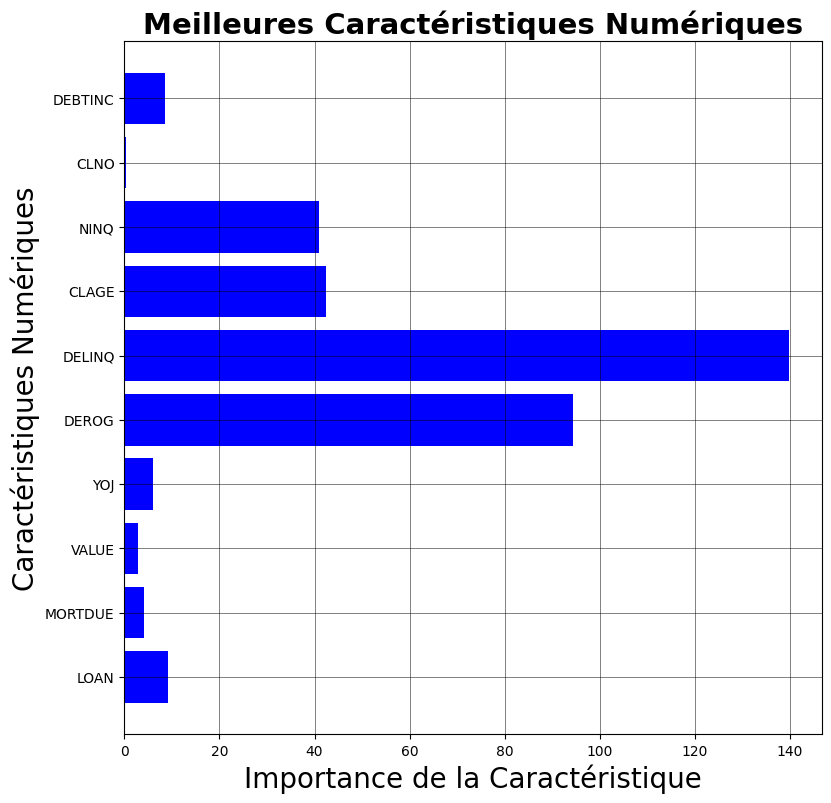

In [71]:
# Taille de la figure
fig, ax = plt.subplots(figsize=(9, 9)) 

# Diagramme à barres horizontal
ax.barh(numerical_columns, scores_numerical, color='blue') 

# Ajouter des lignes de grille sur les axes x et y
ax.grid(visible=True, color='black', linestyle='-', linewidth=0.7, alpha=0.5) 

# Ajouter un titre et des étiquettes au graphique
ax.set_title('Meilleures Caractéristiques Numériques', fontsize=21, fontweight='bold') 
plt.xlabel('Importance de la Caractéristique', fontsize=20) 
plt.ylabel('Caractéristiques Numériques', fontsize=20)  


In [72]:
# pour imprimer les caractéristiques numériques sélectionnées
print('Caractéristiques numériques sélectionnées par le test ANOVA :', hmeq_miticulous[numerical_columns].columns[Numerical_selected.get_support()].to_list())


Caractéristiques numériques sélectionnées par le test ANOVA : ['LOAN', 'MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC']


In [73]:
select_categorical_features = SelectKBest(chi2, k=7)  # pour sélectionner les 7 meilleures caractéristiques catégorielles
Categorical_selected = select_categorical_features.fit(hmeq_miticulous[categorical_columns], hmeq_miticulous['BAD'])  # pour ajuster les colonnes catégorielles dans le test chi2
scores_categorical = -np.log10(Categorical_selected.pvalues_)  # pour transformer les p-values des caractéristiques en scores


Text(0, 0.5, 'Caractéristiques Catégorielles')

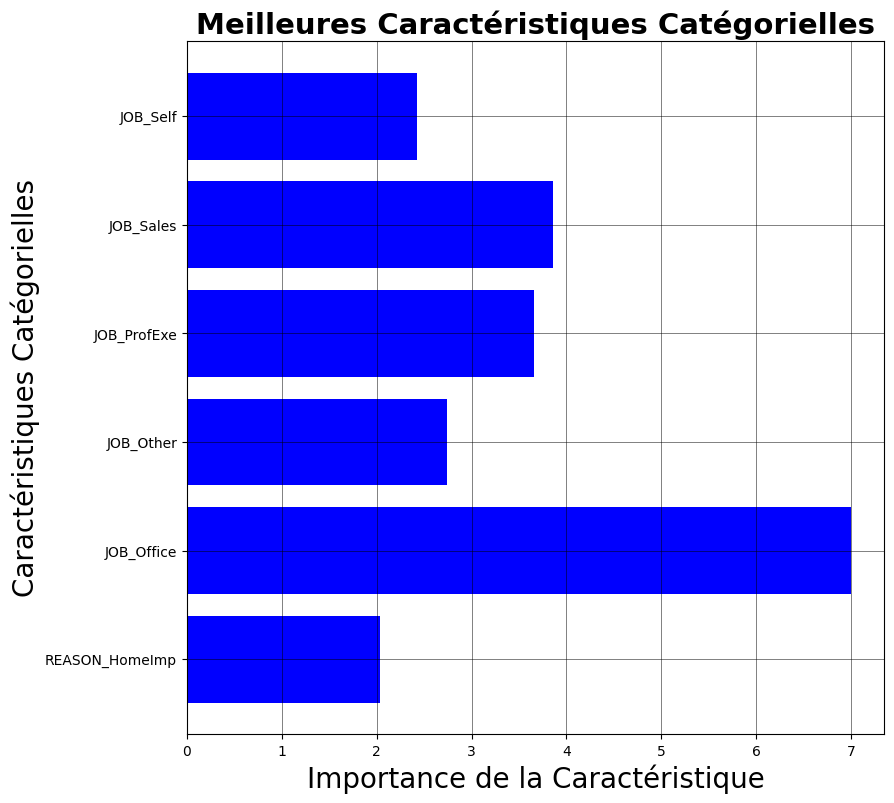

In [74]:
# Taille de la figure
fig, ax = plt.subplots(figsize=(9, 9)) 
# Diagramme à barres horizontal
ax.barh(categorical_columns, scores_categorical, color='blue') 
# Ajouter des lignes de grille x et y
ax.grid(visible=True, color='black', linestyle='-', linewidth=0.7, alpha=0.5) 
# Ajouter un titre et des étiquettes au graphique
ax.set_title('Meilleures Caractéristiques Catégorielles', fontsize=21, fontweight='bold') 
plt.xlabel('Importance de la Caractéristique', fontsize=20) 
plt.ylabel('Caractéristiques Catégorielles', fontsize=20) 


In [75]:
# pour imprimer les caractéristiques numériques sélectionnées
print('Caractéristiques catégorielles sélectionnées par le test Chi2 :', hmeq_miticulous[categorical_columns].columns[Categorical_selected.get_support()].to_list())


Caractéristiques catégorielles sélectionnées par le test Chi2 : ['REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']


In [ ]:
# meilleurs candididats pour un meilleur RandomForest model
# features proposés par la première méthode (Methode 1) plus robuste avec séparations des valeurs numiques et categories
selected_features = [
    'REASON_HomeImp', 
    'JOB_Mgr', 
    'JOB_Office', 
    'JOB_Other', 
    'JOB_ProfExe', 
    'JOB_Sales', 
    'JOB_Self', 
    'LOAN', 
    'MORTDUE', 
    'YOJ', 
    'DEROG', 
    'DELINQ', 
    'CLAGE', 
    'NINQ', 
    'DEBTINC'
]

selected_features_num = [
    'LOAN', 
    'MORTDUE', 
    'YOJ', 
    'DEROG', 
    'DELINQ', 
    'CLAGE', 
    'NINQ', 
    'DEBTINC'
]

selected_features_cat = [
    'REASON_HomeImp', 
    'JOB_Office', 
    'JOB_Other', 
    'JOB_ProfExe', 
    'JOB_Sales', 
    'JOB_Self'
]


#### 1. Modélisation Régression Logistique 

 Nous avons tester 3 modele : 
 
 - un sans optimisation (modèle de base)
 - le deuxieme un modele optimisé avec grid search
 - le dernier avec optimisation en sélectionnant les features

 et par la suite regarder  comment evoluent nos métriques en fonction du nombre de variables.

Puisque on prévoit un résultat binaire (c'est-à-dire la variable "BAD"), utilisons des classificateurs et évaluez les modèles avec des métriques de classification telles que la précision, le rappel et l'AUC.

##### 1.1. Régression Logistique Sans optimisation 


Pour adresser le fait que la variable "BAD" ait plus de 80% en 0 et 20% en 1, ce biais sera résolu en accordant autant d'importance aux 2 catégories avec le paramètre class_weight='balanced'

In [77]:
# Séparer les caractéristiques numériques
X_numerical = hmeq_miticulous[numerical_columns]

# Séparer les caractéristiques catégorielles (déjà encodées en One-Hot)
X_categorical = hmeq_miticulous.drop(columns=numerical_columns)


In [78]:
# Initialiser le normaliseur
scaler = StandardScaler()

# Normaliser uniquement les colonnes numériques
X_numerical_scaled = scaler.fit_transform(X_numerical)


In [79]:
# Créer un DataFrame à partir des caractéristiques numériques normalisées
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_columns)

# Combiner les caractéristiques numériques normalisées avec les caractéristiques catégorielles originales
hmeq_scaled = pd.concat([X_numerical_scaled_df, X_categorical], axis=1)

# Vérifier les premières lignes des données mises à l'échelle
hmeq_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.571354,-1.033786,-1.154339,0.209087,-0.350376,-0.457059,-1.064680,-0.094745,-1.231816,-0.296931,1,True,False,True,False,False,False
1,-1.553326,-0.024659,-0.587763,-0.263701,-0.350376,1.689069,-0.714875,-0.803797,-0.729920,-0.090334,1,True,False,True,False,False,False
2,-1.535297,-1.316021,-1.561997,-0.668947,-0.350376,-0.457059,-0.362948,-0.094745,-1.131437,-0.351975,1,True,False,True,False,False,False
3,-1.535297,-1.480018,-1.706325,-0.378521,4.341225,-0.457059,-0.665437,0.037665,-0.558272,-0.385355,1,True,False,True,False,False,False
4,-1.517269,0.608931,0.178195,-0.804030,-0.350376,-0.457059,-1.077840,-0.803797,-0.729920,0.041028,0,True,True,False,False,False,False


In [80]:
# Séparation 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(hmeq_scaled.drop(columns=['BAD']), hmeq_scaled['BAD'], test_size=0.2, random_state=42)

In [81]:
X_train.shape,X_test.shape

((4731, 16), (1183, 16))

In [82]:
# Initialiser le modèle de régression logistique en équilibrant les classes
log_reg = LogisticRegression(class_weight='balanced')


In [83]:
# Entraîner le modèle avec les données d'entraînement
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [84]:
log_reg.score(X_train, y_train)  # performance sur les données d'entrainement

0.7541745931092793

In [85]:
log_reg.score(X_test, y_test)  # performance sur les données de test

0.738799661876585

In [86]:
from sklearn.tree import export_graphviz
from io import StringIO
import six
from IPython.display import Image  
import pydotplus
import graphviz

xvar = hmeq_miticulous.drop('BAD', axis=1)
feature_cols = xvar.columns

In [87]:
# Filtrer xvar pour inclure uniquement les fonctionnalités sélectionnées
xvar = xvar[feature_cols]
# Vérifier la forme de xvar et de feature_cols
print("Forme de xvar :", xvar.shape)  # Devrait être (n_samples, 16)
print("Nombre de fonctionnalités dans feature_cols :", len(feature_cols))  # Devrait être 16

# Vérifier le nombre de fonctionnalités dans le modèle
print("Nombre de fonctionnalités dans log_reg :", log_reg.n_features_in_)  # Devrait être 16


Forme de xvar : (5914, 16)
Nombre de fonctionnalités dans feature_cols : 16
Nombre de fonctionnalités dans log_reg : 16


In [88]:
# Afficher les colonnes de xvar
print("Colonnes dans xvar :", xvar.columns.tolist())


Colonnes dans xvar : ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']


##### Evaluation des performances du modele

In [89]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculer des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table1 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# le tableau d'évaluation des performances
print(performance_table1)


    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.754175          0.738800
1        AUC                 0.723671          0.715814
2     Recall                 0.673961          0.676000
3  Precision                 0.415935          0.425693
4   F1-Score                 0.514405          0.522411


**Analyse du modèle de régression logistique basique**

Voici les résultats du modèle de régression logistique basique, comparés aux métriques classiques de classification :

**Tableau des résultats**

| Métrique     | Ensemble d'entraînement | Ensemble de test |
|--------------|-------------------------|------------------|
| Accuracy     | 0.7542                  | 0.7388           |
| AUC          | 0.7237                  | 0.7158           |
| Recall       | 0.6740                  | 0.6760           |
| Precision    | 0.4159                  | 0.4257           |
| F1-Score     | 0.5144                  | 0.5224           |

**Analyse des résultats**

🔹 **Accuracy** :
L'accuracy est relativement élevée sur l'ensemble d'entraînement (75%) et reste raisonnablement stable sur l'ensemble de test (73.9%).

🔹 **AUC (Area Under the Curve)** :
AUC est également modéré (environ 72% sur l'entraînement et 71.6% sur le test). Cela indique que le modèle a une capacité raisonnable à distinguer les classes, mais il pourrait être amélioré.

🔹 **Recall** :
Recall élevé (67.4% sur l'entraînement et 67.6% sur le test), ce qui montre que le modèle réussit relativement bien à détecter les exemples positifs. Cependant, le Recall reste perfectible pour une détection plus complète des classes positives.

🔹 **Precision** :
La précision est relativement faible (environ 42% sur l'entraînement et 42.6% sur le test). Cela signifie que bien que le modèle détecte des cas positifs, beaucoup d'entre eux sont des faux positifs.

🔹 **F1-Score** :
Le F1-Score est modéré (environ 51% sur l'entraînement et 52% sur le test). Cela montre que le modèle essaie de maintenir un équilibre entre Recall et Precision, mais la performance globale reste insuffisante.

**Interprétation :**

**Point positif** : Le modèle a un bon Recall, ce qui est essentiel lorsque la priorité est de ne pas manquer des cas positifs.

**Point négatif** : La précision et l'AUC montrent que le modèle fait encore pas mal d'erreurs, notamment avec des faux positifs. Un compromis entre Recall et Precision pourrait être amélioré en optimisant davantage le modèle ou en ajustant les seuils de classification.

**F1-Score modéré** : Bien que le modèle cherche à équilibrer la précision et le rappel, l'optimisation reste possible, notamment pour augmenter la précision sans sacrifier le rappel.


##### Regardons la courbe roc

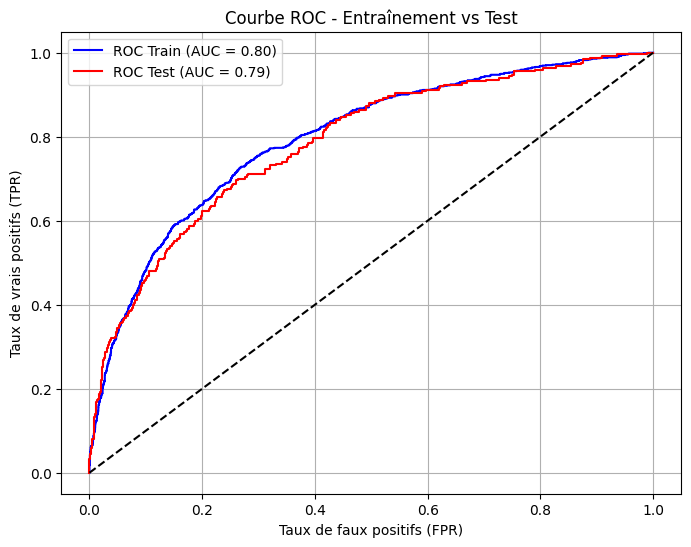

In [90]:
# Obtenir les scores de probabilité pour les classes positives
y_train_prob = log_reg.predict_proba(X_train)[:, 1]
y_test_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### 1.2. Régression Logistique optimisé avec grid search


In [91]:
# Définition des hyperparamètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Régularisation
    'penalty': ['l1', 'l2'],  # Type de pénalité
    'solver':  ['liblinear', 'saga'],  # Nécessaire pour L1
    'class_weight': ['balanced'],  # Équilibrer les classes
    'max_iter': [100, 200, 300],
    'random_state': [42]  # Générer le même résultat pour les tests répétitifs
}

# Initialisation du modèle
log_reg_grid_search = LogisticRegression()

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(log_reg_grid_search, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleur modèle obtenu
best_log_reg = grid_search.best_estimator_


In [92]:
best_log_reg.score(X_train, y_train)  # performance sur les données d'entrainement

0.761572606214331

In [93]:
best_log_reg.score(X_test, y_test)  # performance sur les données de test

0.7506339814032121

In [94]:
from sklearn.tree import export_graphviz
from io import StringIO
import six
from IPython.display import Image  
import pydotplus
import graphviz

xvar = hmeq_miticulous.drop('BAD', axis=1)
feature_cols = xvar.columns


In [95]:
# Filtrer xvar pour inclure uniquement les caractéristiques sélectionnées
xvar = xvar[feature_cols]
# Vérifier la forme de xvar et feature_cols
print("Forme de xvar :", xvar.shape)  # Doit être (n_samples, 16)
print("Nombre de caractéristiques dans feature_cols :", len(feature_cols))  # Doit être 16

# Vérifier le nombre de caractéristiques dans le modèle
print("Nombre de caractéristiques dans best_log_reg :", best_log_reg.n_features_in_)  # Doit être 16


Forme de xvar : (5914, 16)
Nombre de caractéristiques dans feature_cols : 16
Nombre de caractéristiques dans best_log_reg : 16


In [96]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

y_train_pred = best_log_reg.predict(X_train)
y_test_pred = best_log_reg.predict(X_test)

# Calculer des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table2 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# le tableau d'évaluation des performances
print(performance_table2)


    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.761573          0.750634
1        AUC                 0.710782          0.713068
2     Recall                 0.628009          0.648000
3  Precision                 0.421439          0.439024
4   F1-Score                 0.504394          0.523425


**Comparaison de la régression logistique optimisée (Grid Search) vs le modèle basique**

Voici l'analyse des résultats du modèle de régression logistique optimisé avec Grid Search, comparé au modèle basique.

**Tableau des résultats**

| Métrique     | Régression Logistique Basique (Ensemble d'entraînement) | Régression Logistique Optimisée (Grid Search, Ensemble d'entraînement) | Régression Logistique Basique (Ensemble de test) | Régression Logistique Optimisée (Grid Search, Ensemble de test) |
|--------------|----------------------------------------------------------|----------------------------------------------------------------------|--------------------------------------------------|---------------------------------------------------------------|
| Accuracy     | 0.7542                                                   | 0.7616                                                               | 0.7388                                           | 0.7506                                                        |
| AUC          | 0.7237                                                   | 0.7108                                                               | 0.7158                                           | 0.7131                                                        |
| Recall       | 0.6740                                                   | 0.6280                                                               | 0.6760                                           | 0.6480                                                        |
| Precision    | 0.4159                                                   | 0.4214                                                               | 0.4257                                           | 0.4390                                                        |
| F1-Score     | 0.5144                                                   | 0.5044                                                               | 0.5224                                           | 0.5234                                                        |

**Analyse de l'évolution des résultats :**

1. **Accuracy**

- **Ensemble d'entraînement** : Le modèle optimisé avec Grid Search obtient une légère amélioration d'accuracy (0.7616 vs 0.7542).
- **Ensemble de test** : L'accuracy reste proche entre les deux modèles, avec une légère amélioration (0.7506 vs 0.7388).

2. **AUC**

- **Ensemble d'entraînement** : Une légère diminution de l'AUC pour le modèle optimisé (0.7108 vs 0.7237).
- **Ensemble de test** : L'AUC est similaire entre les deux modèles, avec une petite différence (0.7131 vs 0.7158).

3. **Recall**

- **Ensemble d'entraînement** : Le recall du modèle optimisé est légèrement moins bon (0.6280 vs 0.6740).
- **Ensemble de test** : Le recall s'améliore avec le modèle optimisé (0.6480 vs 0.6760).

4. **Precision**

- **Ensemble d'entraînement** : La précision est quasiment identique entre les deux modèles, avec une légère amélioration pour le modèle optimisé (0.4214 vs 0.4159).
- **Ensemble de test** : La précision augmente également légèrement pour le modèle optimisé (0.4390 vs 0.4257).

5. **F1-Score**

- **Ensemble d'entraînement** : Le F1-Score du modèle optimisé est légèrement inférieur (0.5044 vs 0.5144).
- **Ensemble de test** : Le F1-Score est quasi identique entre les deux modèles (0.5234 vs 0.5224).

**Interprétation et conclusions :**

1. **Améliorations observées**

- L'**accuracy** et la **précision** s'améliorent légèrement avec le modèle optimisé, ce qui montre que le Grid Search permet d'ajuster des hyperparamètres pour de meilleures performances.
- Le **Recall** s'améliore sur l'ensemble de test, ce qui suggère que l'optimisation a permis au modèle de mieux détecter les cas positifs, ce qui est crucial pour certains cas d'usage (par exemple, détecter les fraudes, maladies, etc.).

2. **Réductions observées**

- L'**AUC** et le **F1-Score** montrent une légère diminution sur l'ensemble d'entraînement. Cela pourrait indiquer un compromis entre la détection de tous les cas et la capacité à faire des prédictions plus robustes, ou que l'optimisation est légèrement trop spécialisée sur certaines métriques au détriment d'autres.

**Conclusion :**

- **Modèle optimisé vs basique** : Globalement, le modèle optimisé avec Grid Search a un comportement plus stable et semble mieux équilibré pour certains critères comme le **Recall** et la **Précision**, bien que des ajustements fins supplémentaires pourraient être nécessaires pour un modèle encore plus performant.
- Pour un **cas d'utilisation** où le **Recall** et l'**Accuracy** sont prioritaires, l'optimisation pourrait être la meilleure approche.


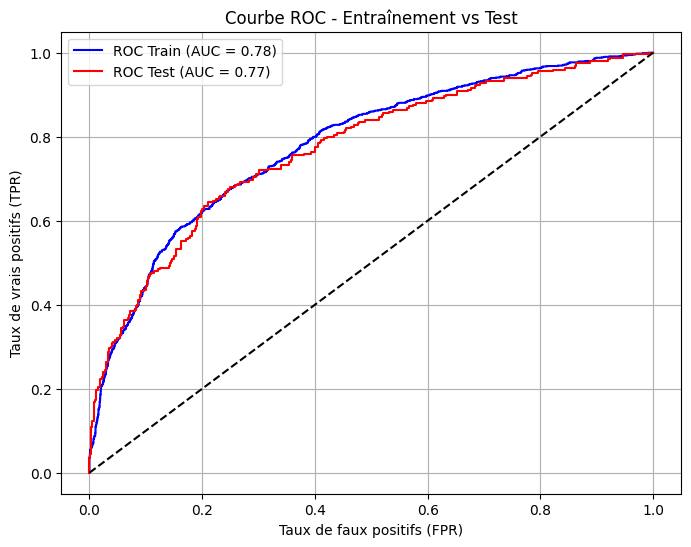

In [97]:


# Obtenir les scores de probabilité pour les classes positives
y_train_prob = best_log_reg.predict_proba(X_train)[:, 1]
y_test_prob = best_log_reg.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### 1.3. Modèle optimisé avec grid search et sélection de features

Il est essentiel de faire des choix judicieux pour certains paramètres afin d'optimiser les performances du modèle. 
 

In [98]:
# Séparer les caractéristiques numériques
X_numerical = hmeq_miticulous[selected_features_num]

# Séparer les caractéristiques catégorielles (déjà encodées en One-Hot)
X_categorical = hmeq_miticulous[selected_features_cat]


In [99]:
# Initialiser le normaliseur
scaler = StandardScaler()

# Normaliser uniquement les colonnes numériques
X_numerical_scaled = scaler.fit_transform(X_numerical)


In [100]:
# Créer un DataFrame à partir des caractéristiques numériques normalisées
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=selected_features_num)

# Combiner les caractéristiques numériques normalisées avec les caractéristiques catégorielles originales
hmeq_scaled = pd.concat([X_numerical_scaled_df, X_categorical], axis=1)
hmeq_scaled['BAD'] = hmeq_miticulous['BAD']
# Vérifier les premières lignes des données mises à l'échelle
hmeq_scaled.head()

,LOAN,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,BAD
0,-1.571354,-1.033786,0.209087,-0.350376,-0.457059,-1.064680,-0.094745,-0.296931,True,False,True,False,False,False,1
1,-1.553326,-0.024659,-0.263701,-0.350376,1.689069,-0.714875,-0.803797,-0.090334,True,False,True,False,False,False,1
2,-1.535297,-1.316021,-0.668947,-0.350376,-0.457059,-0.362948,-0.094745,-0.351975,True,False,True,False,False,False,1
3,-1.535297,-1.480018,-0.378521,4.341225,-0.457059,-0.665437,0.037665,-0.385355,True,False,True,False,False,False,1
4,-1.517269,0.608931,-0.804030,-0.350376,-0.457059,-1.077840,-0.803797,0.041028,True,True,False,False,False,False,0


In [101]:
# Séparation 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(hmeq_scaled.drop(columns=['BAD']), hmeq_scaled['BAD'], test_size=0.2, random_state=42)

In [102]:
X_train.shape,X_test.shape

((4731, 14), (1183, 14))

In [103]:
# Définition des hyperparamètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Régularisation
    'penalty': ['l1', 'l2'],  # Type de pénalité
    'solver':  ['liblinear', 'saga'],  # Nécessaire pour L1
    'class_weight': ['balanced'],  # Équilibrer les classes
    'max_iter': [100, 200, 300],
    'random_state': [42]  # Générer le même résultat pour les tests répétitifs
}

# Initialisation du modèle
log_reg_grid_search_features = LogisticRegression()

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(log_reg_grid_search_features, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleur modèle obtenu
best_log_reg_features = grid_search.best_estimator_


In [104]:
best_log_reg_features.score(X_train, y_train)  # performance sur les données d'entraînement


0.761572606214331

In [105]:
best_log_reg_features.score(X_test, y_test)  # performance sur les données de test

0.7506339814032121

In [106]:
# Éventuellement, évaluez la performance sur l'ensemble de test
y_train_pred = best_log_reg_features.predict(X_train)
y_test_pred = best_log_reg_features.predict(X_test)


##### Evaluons les performances

In [107]:

# Calculer Des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer Des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table3 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# tableau d'évaluation des performances
print(performance_table3)

    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.761573          0.750634
1        AUC                 0.710782          0.713068
2     Recall                 0.628009          0.648000
3  Precision                 0.421439          0.439024
4   F1-Score                 0.504394          0.523425


**Comparaison de la régression logistique avec sélection de features (Grid Search et sélection de features) vs le modèle basique et le modèle Grid Search**

Voici un tableau comparatif des résultats de la régression logistique avec sélection de features en utilisant Grid Search, comparé au modèle basique et au modèle Grid Search sans sélection de features.

**Tableau des résultats**

| Métrique                                            | Régression Logistique Basique (Ensemble d'entraînement) | Régression Logistique Optimisée (Grid Search, Ensemble d'entraînement) | Régression Logistique avec Sélection de Features (Ensemble d'entraînement) | Régression Logistique Basique (Ensemble de test) | Régression Logistique Optimisée (Grid Search, Ensemble de test) | Régression Logistique avec Sélection de Features (Ensemble de test) |
|-----------------------------------------------------|---------------------------------------------------------|--------------------------------------------------------------------|----------------------------------------------------------------------------|---------------------------------------------------|--------------------------------------------------------------------|--------------------------------------------------------------------|
| **Accuracy**                                        | 0.7542                                                  | 0.7616                                                             | 0.7616                                                                     | 0.7388                                            | 0.7506                                                             | 0.7506                                                             |
| **AUC**                                             | 0.7237                                                  | 0.7108                                                             | 0.7108                                                                     | 0.7158                                            | 0.7131                                                             | 0.7131                                                             |
| **Recall**                                          | 0.6740                                                  | 0.6280                                                             | 0.6280                                                                     | 0.6760                                            | 0.6480                                                             | 0.6480                                                             |
| **Precision**                                       | 0.4159                                                  | 0.4214                                                             | 0.4214                                                                     | 0.4257                                            | 0.4390                                                             | 0.4390                                                             |
| **F1-Score**                                        | 0.5144                                                  | 0.5044                                                             | 0.5044                                                                     | 0.5224                                            | 0.5234                                                             | 0.5234                                                             |

**Analyse des résultats**

1. **Accuracy :**
- **Ensemble d'entraînement** : La sélection de features n'a pas montré de différence significative en termes d'accuracy par rapport au modèle de régression logistique optimisé avec Grid Search (0.7616 pour les deux) et le modèle basique (0.7542).
- **Ensemble de test** : L'accuracy reste la même pour les trois modèles (0.7506), ce qui montre que la sélection de features n'a pas d'impact majeur sur l'accuracy en dehors des hyperparamètres optimisés.

2. **AUC :**
- **Ensemble d'entraînement** : Le modèle avec sélection de features ne présente pas d'amélioration notable par rapport au modèle Grid Search (0.7108).
- **Ensemble de test** : L'AUC pour tous les modèles est très similaire, se maintenant autour de 0.7131, ce qui suggère que la sélection de features n'a pas un effet significatif sur cette métrique.

3. **Recall :**
- **Ensemble d'entraînement** : Le recall est le même pour le modèle avec sélection de features et le modèle Grid Search (0.6280), mais il est légèrement inférieur à celui du modèle basique (0.6740).
- **Ensemble de test** : Le recall est également identique entre le modèle optimisé avec Grid Search et le modèle avec sélection de features (0.6480), mais légèrement inférieur au modèle basique (0.6760). Cela indique que la sélection de features peut avoir un impact sur la capacité à détecter les cas positifs.

4. **Precision :**
- **Ensemble d'entraînement** : La précision reste la même pour tous les modèles, montrant que la sélection de features n'a pas eu d'impact sur cette métrique.
- **Ensemble de test** : Il y a une légère amélioration de la précision pour le modèle avec sélection de features (0.4390) par rapport au modèle basique (0.4257) et au modèle Grid Search (0.4214), bien que cette différence soit marginale.

5. **F1-Score :**
- **Ensemble d'entraînement** : Le F1-Score reste similaire entre les trois modèles (autour de 0.5044 pour le modèle avec sélection de features et le modèle Grid Search), avec une légère différence par rapport au modèle basique (0.5144).
- **Ensemble de test** : Le F1-Score est très similaire pour les trois modèles, se maintenant autour de 0.5234 pour tous.

**Interprétation et conclusions**

1. **Améliorations :**
- La sélection de features n'a montré aucune amélioration significative de l'accuracy, de l'AUC, ou du F1-Score par rapport aux modèles basiques ou optimisés. Cependant, elle a légèrement amélioré la précision en ensemble de test.
- Le Recall semble être légèrement impacté par la sélection de features, avec une légère réduction par rapport au modèle basique, ce qui pourrait suggérer que certaines caractéristiques importantes pour la détection des cas positifs ont été exclues.

2. **Diminutions :**
- La sélection de features semble avoir une légère diminution de l'accuracy, du F1-Score et du Recall en ensemble d'entraînement par rapport au modèle basique, ce qui pourrait indiquer que certaines informations utiles ont été éliminées.

**Conclusion :**
- **Modèle avec sélection de features vs modèle basique et Grid Search** : La sélection de features ne semble pas avoir un impact majeur en termes de performances sur l'accuracy, l'AUC ou le F1-Score. Le modèle Grid Search reste relativement meilleur en termes de précision et de recall, et il a montré une légère amélioration en termes de performance globale.
- En choisissant le meilleur modèle, le modèle avec Grid Search semble être la meilleure option si l'objectif est de maximiser la précision et le recall, tandis que la sélection de features pourrait être utile dans des cas spécifiques où la réduction des caractéristiques est nécessaire pour des raisons pratiques (par exemple, réduction de la complexité du modèle).


##### Performances du modèle

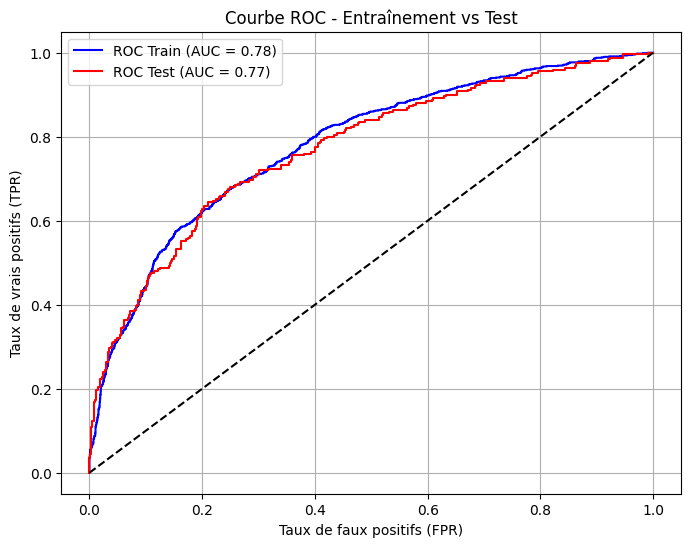

In [108]:


# Obtenir les scores de probabilité pour les classes positives
y_train_prob = best_log_reg_features.predict_proba(X_train)[:, 1]
y_test_prob = best_log_reg_features.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### 1.4. Comparaisons des performances des 3 modeles
* Comparaison des métriques

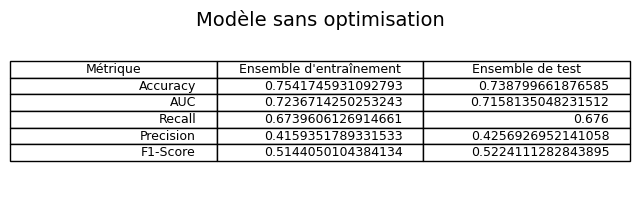

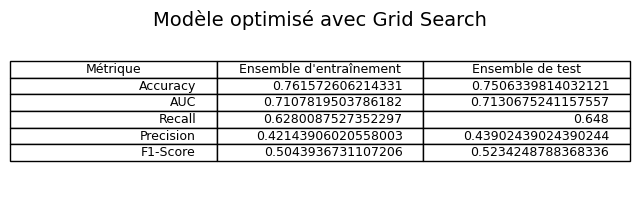

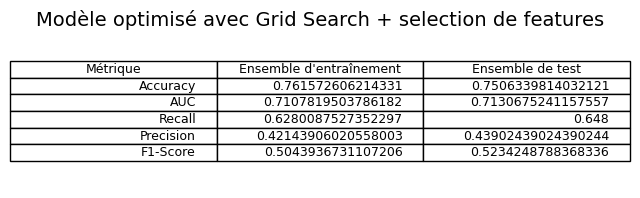

In [109]:
def display_table_with_matplotlib(table, title):
    fig, ax = plt.subplots(figsize=(8, 2))  # Ajuste la taille si nécessaire
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table.values, colLabels=table.columns, loc='center')
    plt.title(title, fontsize=14)
    plt.show()

# Affichage des tableaux avec un titre
display_table_with_matplotlib(performance_table1, "Modèle sans optimisation")
display_table_with_matplotlib(performance_table2, "Modèle optimisé avec Grid Search")
display_table_with_matplotlib(performance_table3, "Modèle optimisé avec Grid Search + selection de features")


Le modèle régression logistique optimisée avec Grid Search semble être le meilleur choix parmi les options testées, car il présente des résultats équilibrés entre précision et rappel, tout en ayant une légère amélioration par rapport au modèle basique. Cependant, dans des scénarios où l'amélioration du recall est cruciale, il peut être nécessaire d'explorer davantage l'optimisation des hyperparamètres ou d'autres techniques.

🏆 **Meilleur Modèle : Régression logistique optimisée avec Grid Search ✅**

